In [47]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [11]:
single_image = x_train[0]

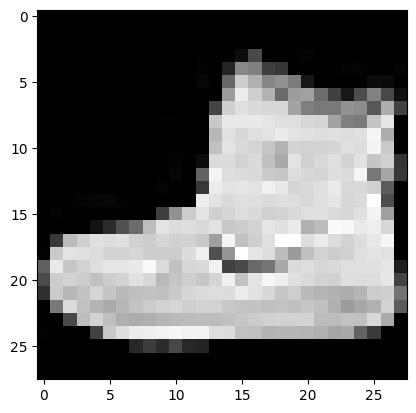

In [14]:
plt.imshow(single_image, cmap='gray')
plt.show()

In [16]:
x_train = x_train / 255
x_test = x_test / 255

In [17]:
x_train.max()

1.0

In [18]:
y_train_cat = tf.keras.utils.to_categorical(y_train)
y_test_cat = tf.keras.utils.to_categorical(y_test)

In [19]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [20]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train.reshape(60000, 28, 28, 1)
x_test.reshape(10000, 28, 28, 1)

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [23]:
layers = tf.keras.layers

In [70]:
model = tf.keras.models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(4,4), strides=(1,1), input_shape=(28,28,1), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),

    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [71]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=1)

In [72]:
model.fit(x=x_train, y=y_train_cat, epochs=10, validation_data=(x_test, y_test_cat), callbacks=[early_stopping])

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.4118 - accuracy: 0.8521 - val_loss: 0.3468 - val_accuracy: 0.8775
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.2842 - accuracy: 0.8959 - val_loss: 0.2918 - val_accuracy: 0.8955
Epoch 3/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2398 - accuracy: 0.9104 - val_loss: 0.2868 - val_accuracy: 0.8947
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.2035 - accuracy: 0.9249 - val_loss: 0.2621 - val_accuracy: 0.9055
Epoch 5/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1735 - accuracy: 0.9358 - val_loss: 0.2620 - val_accuracy: 0.9064
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1518 - accuracy: 0.9429 - val_loss: 0.2885 - val_accuracy: 0.9024
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1296 - accuracy: 0.9520 - val_loss: 0.2815 -

In [73]:
metrics = pd.DataFrame(model.history.history)

In [74]:
model.metrics_names

['loss', 'accuracy']

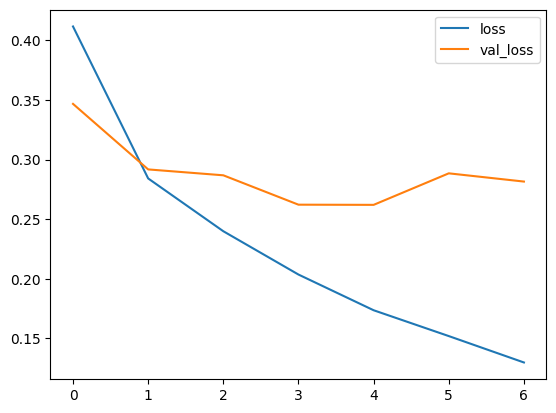

In [75]:
metrics[['loss', 'val_loss']].plot()
plt.show()

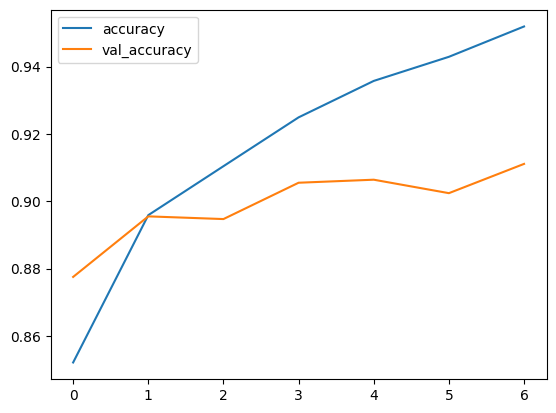

In [76]:
metrics[['accuracy', 'val_accuracy']].plot()
plt.show()

In [77]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 4ms/step - loss: 0.2815 - accuracy: 0.9111


[0.28154826164245605, 0.9110999703407288]

In [78]:
predictions = np.argmax((model.predict(x_test) > 0.5).astype('int32'), axis=1)

313/313 [==============================] - 1s 4ms/step


In [79]:
predictions

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83      1000
           1       1.00      0.98      0.99      1000
           2       0.80      0.90      0.85      1000
           3       0.90      0.94      0.92      1000
           4       0.93      0.77      0.84      1000
           5       0.97      0.99      0.98      1000
           6       0.81      0.72      0.76      1000
           7       0.96      0.97      0.96      1000
           8       0.99      0.98      0.99      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [82]:
print(confusion_matrix(y_test, predictions))

[[894   0  27  20   1   1  55   0   2   0]
 [ 11 976   0  13   0   0   0   0   0   0]
 [ 33   0 901   8  27   0  31   0   0   0]
 [ 26   1  15 939   4   0  15   0   0   0]
 [ 28   1  96  37 767   1  69   0   1   0]
 [  1   0   0   0   0 988   0   8   0   3]
 [143   0  81  24  25   0 720   0   7   0]
 [  1   0   0   0   0  16   0 967   0  16]
 [  5   0   3   5   0   3   1   1 982   0]
 [  3   0   0   0   0  11   1  30   0 955]]


In [83]:
np.random.seed(101)
pred_index = np.random.randint(len(x_test))
pred_image = x_test[pred_index]
print(pred_index)

1547


In [84]:
pred_image.shape

(28, 28)

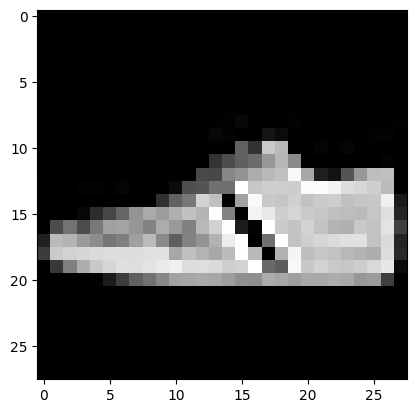

In [85]:
plt.imshow(pred_image, cmap='gray')
plt.show()

In [86]:
pred_image = pred_image.reshape(1,28,28,1)

In [87]:
np.argmax((model.predict(pred_image) > 0.5).astype('int32'), axis=1)

1/1 [==============================] - 0s 84ms/step


array([7], dtype=int64)

In [88]:
y_test[pred_index]

7